# 01. Import libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\astat\Documents\Final project'

In [4]:
#Import data
crime_police = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned3.pkl'))

In [5]:
crime_police.head()

,Staff_area_name,crime_area,Geo_boundries_Data_match,number_residents,number_police,year,police_per_1000,number_spc,id,date,...,crime_type,outcome_cat,month,number_crimes,crime_per_officer,crime_per_residents,crime,area_size,pop_density,urban
0,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,0,2020-01,...,14,24.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0
1,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,1,2020-01,...,8,10.0,1,27252,5.099551,11.683601,Weapons & Drugs,2029.0,1149.581074,0
2,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,2,2020-01,...,2,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
3,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,3,2020-01,...,3,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
4,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,4,2020-01,...,4,10.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0


In [6]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18362528 entries, 0 to 7893406
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Staff_area_name           object 
 1   crime_area                int8   
 2   Geo_boundries_Data_match  object 
 3   number_residents          float32
 4   number_police             float16
 5   year                      int16  
 6   police_per_1000           float16
 7   number_spc                float16
 8   id                        int32  
 9   date                      object 
 10  reported                  int8   
 11  lsoa_code                 object 
 12  lsoa_name                 object 
 13  crime_type                int8   
 14  outcome_cat               float16
 15  month                     int8   
 16  number_crimes             int32  
 17  crime_per_officer         float32
 18  crime_per_residents       float32
 19  crime                     object 
 20  area_size              

# 02. Clean data

In [7]:
#Check for missing values
crime_police.isnull().sum()

Staff_area_name                   0
crime_area                        0
Geo_boundries_Data_match          0
number_residents                  0
number_police                     0
year                              0
police_per_1000                   0
number_spc                    22556
id                                0
date                              0
reported                          0
lsoa_code                         0
lsoa_name                         0
crime_type                        0
outcome_cat                 4340696
month                             0
number_crimes                     0
crime_per_officer                 0
crime_per_residents               0
crime                             0
area_size                         0
pop_density                       0
urban                             0
dtype: int64

In [8]:
#Check for duplicates
dups = crime_police.duplicated()

In [9]:
dups.shape # No dups

(18362528,)

# 03. Data prep

#### Hypothesis: Areas with a high population density report more crimes.

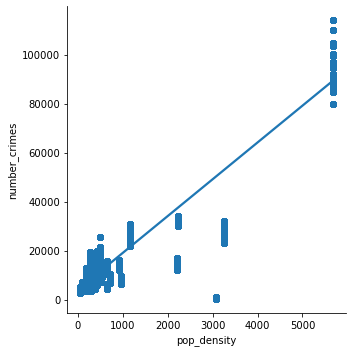

In [10]:
#Scatterplot for the "pop_density" and "number_crimes" 
sns.lmplot(x = 'pop_density', y = 'number_crimes', data = crime_police)

In [11]:
#Reshape the variables into NumPy arrays
X = crime_police['pop_density'].values.reshape(-1,1)
y = crime_police['number_crimes'].values.reshape(-1,1)

In [12]:
#Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression

In [13]:
#Creating a regression object
regression = LinearRegression() 

In [14]:
#Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predicting the values of y
y_predicted = regression.predict(X_test)

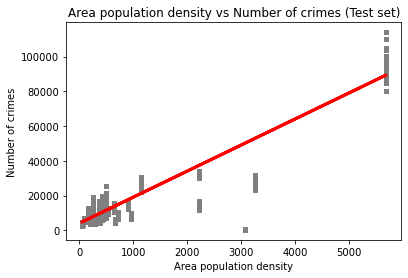

In [20]:
#Creating a plot of the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Area population density vs Number of crimes (Test set)')
plot_test.xlabel('Area population density')
plot_test.ylabel('Number of crimes')
plot_test.savefig(os.path.join(path, 'Analysis','Visualisations', 'regression.png'))
plot_test.show()

The regression matches the data points fairly well, although an exponential line of best fit might be more suitable. This might in large part be due to the outlier (London). There are a few areas with a relatively high density by comparatively low crime rate. This could match the areas around Liverpool and Birmingham, as they did not show as high a crime rate as the level of their population density would make one suspect based on the previous map analysis.

# 05. Performance stats

In [22]:
#Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [23]:
#Model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.02685344]]
Mean squared error:  80307364.1671547
R2 score:  0.9213868774720104


In [24]:
#Comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8965,14899.398252
1,11892,12097.878445
2,9004,18344.842489
3,11892,12097.878445
4,14475,17662.540591
5,99633,89362.872946
6,12346,6613.734692
7,4948,7134.278747
8,17761,11393.913799
9,8485,8005.761939


R2 value for the is pretty high at 0.92, which would indicate a good fit of the model. The MSE value with about 80m shows that the model might not be best suited to make accurate predictions. Althoug population density can be used an indicator for crime levels, it alone does not determine its level, therefore introducing further control variables into the model could improve it's predictions. Furthermore, employing an exponential regression might further reduce the MSE value.